 ### 現在讓我們嘗試在IMDB電影評論分類問題上使用這種模型。 首先，我們預處理數據：

In [1]:
import tensorflow
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# 载入IMDB数据集
max_features = 10000
maxlen = 500
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# 获取单词到整数的映射关系
word_index = imdb.get_word_index()

# 将整数序列转换回文本
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in input_train[0])  # 减去3是因为0、1、2为特殊标记

print(decoded_review)


1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

max_features = 10000  # 要考慮作為特徵的語詞數量
maxlen = 500  # 當句子的長度超過500個語詞的部份,就把它刪除掉
batch_size = 64

# 載入IMDB的資料(單字已轉 label encoding)
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# 如果長度不夠的話就左端補空
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)  #(sample size, timesteps)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
print(input_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [5]:
y_train # label encoding

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# embedding input data shape (sample size, timesteps). Use label encoding, not one hot.##

In [ ]:
# if embedding is not uesd, input_train has to be transformed to shape to input RNN (25000, 500, 10000)

#使用1個`Embedding`層和2個`LSTM`層來訓練一個簡單的循環網絡(`RNN`)：

Embedding嵌入層將正整數轉換為具有固定大小的向量，如[[4],[20]]->[[0.25,0.1],[0.6,-0.2]] (取代one-hot encoding)

Embedding層只能作為模型的第壹層

參數
input_dim：大或等於0的整數，字典長度，即輸入數據最大下標+1

output_dim：大於0的整數，代表全連接嵌入的維度

input_length：當輸入序列的長度固定時，該值為其長度。如果要在該層後接Flatten層，然後接Dense層，則必須指定該參數，否則Dense層的輸出維度無法自動推斷。

輸入shape
形如（samples，sequence_length=time steps）的2D張量

輸出shape
形如(samples, sequence_length, output_dim)的3D張量

https://keras-cn.readthedocs.io/en/latest/layers/embedding_layer/



In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding

model = Sequential()   # 輸入 （sample size，time steps ） with label encoding!!!
model.add(Embedding(max_features+1, 8, input_length=500)) # => Embedding參數(input features, output features (word2vec's size), time steps)
model.add(Dropout(0.5)) # 承接 embedding 輸出 （sample size，time steps, output features）
model.add(LSTM(16, return_sequences=True)) # 輸入 （sample size，time steps, input features）
model.add(Dropout(0.5))
model.add(LSTM(8))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 8)            80008     
                                                                 
 dropout (Dropout)           (None, 500, 8)            0         
                                                                 
 lstm (LSTM)                 (None, 500, 16)           1600      
                                                                 
 dropout_1 (Dropout)         (None, 500, 16)           0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9

我們用圖表來看一下模型在訓練(training)和驗證(validation)的損失(loss)和準確性(accuracy)：

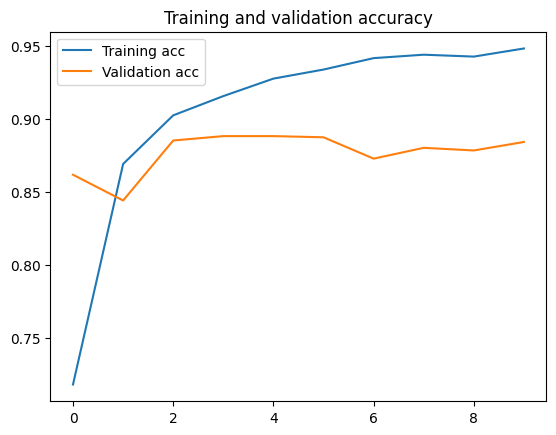

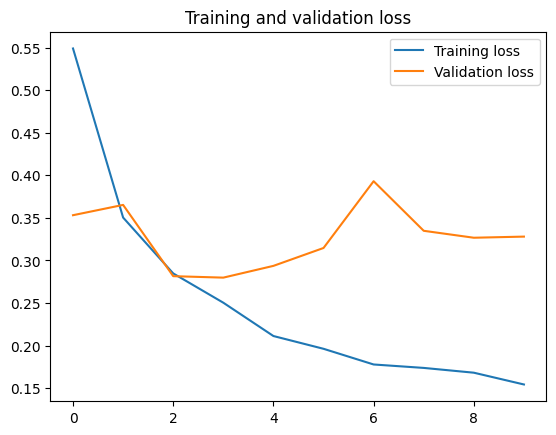

In [7]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#使用1個`Embedding`層和2個`GRU`**層來訓練：**


In [8]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features+1, 8, input_length=500))
model.add(Dropout(0.5))
model.add(GRU(16, return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(8))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 8)            80008     
                                                                 
 dropout_3 (Dropout)         (None, 500, 8)            0         
                                                                 
 gru (GRU)                   (None, 500, 16)           1248      
                                                                 
 dropout_4 (Dropout)         (None, 500, 16)           0         
                                                                 
 gru_1 (GRU)                 (None, 8)                 624       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                

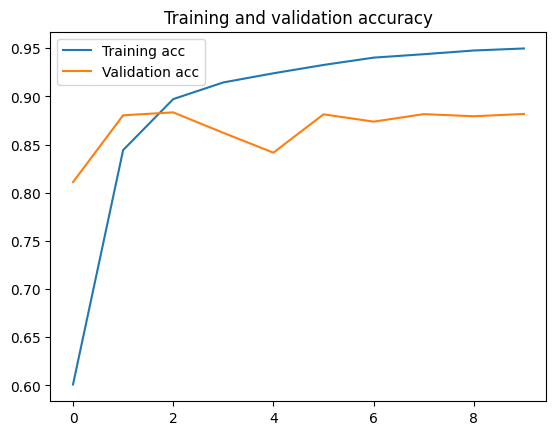

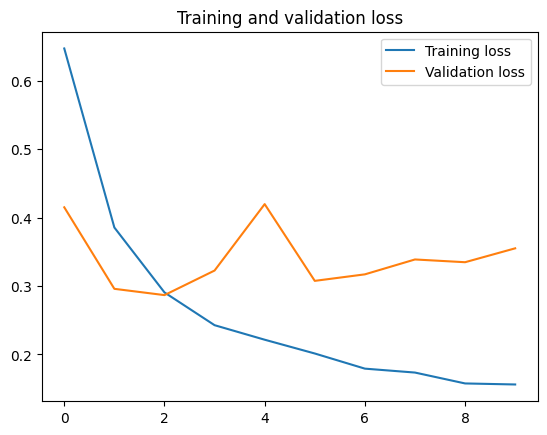

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()